In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
import os

In [2]:
ALPHAS       = [0.00005, 0.00010, 0.00015, 0.0002, 0.0003, 0.0004]
NS           = [1, 3, 5, 7]
TRACE_DECAYS = [0.75, 0.85, 0.95]

NUM_TRAINING_SESSIONS = 10
NUM_ROUNDS = 75

In [3]:
round_lengths_n_step = np.zeros((len(ALPHAS), len(NS), NUM_TRAINING_SESSIONS, NUM_ROUNDS))
round_lengths_sarsa_lambda = np.zeros((len(ALPHAS), len(TRACE_DECAYS), NUM_TRAINING_SESSIONS, NUM_ROUNDS))

In [4]:
print(round_lengths_n_step.shape)
print(round_lengths_sarsa_lambda.shape)

(6, 4, 10, 75)
(6, 3, 10, 75)


In [5]:
for alpha_index, alpha in enumerate(ALPHAS):
    # Fill in round_lengths_n_step
    for n_index, n in enumerate(NS):
        folder_name = f"N-STEP-SARSA-N={n}-LEARNING-RATE={alpha:.6f}"
        histories = [pickle.load(open(historyPath, "rb")) for historyPath in glob.glob(f'{"histories/" + folder_name}/*.pt')]
        round_lengths = [history['round_length'] for history in histories]
        round_lengths_n_step[alpha_index, n_index,:,:] = np.array(round_lengths)
    # Fill round_lengths_sarsa_lambda
    for trace_decay_index, trace_decay in enumerate(TRACE_DECAYS):
        folder_name = f"SARSA(LAMBDA)-TRACE-DECAY={trace_decay:.2f}-LEARNING-RATE={alpha:.6f}"
        histories = [pickle.load(open(historyPath, "rb")) for historyPath in glob.glob(f'{"histories/" + folder_name}/*.pt')]
        round_lengths = [history['round_length'] for history in histories]
        round_lengths_sarsa_lambda[alpha_index, trace_decay_index,:,:] = np.array(round_lengths)

In [6]:
mean_round_lengths_n_step = np.mean(round_lengths_n_step, axis=2)
mean_round_lengths_sarsa_lambda = np.mean(round_lengths_sarsa_lambda, axis=2)

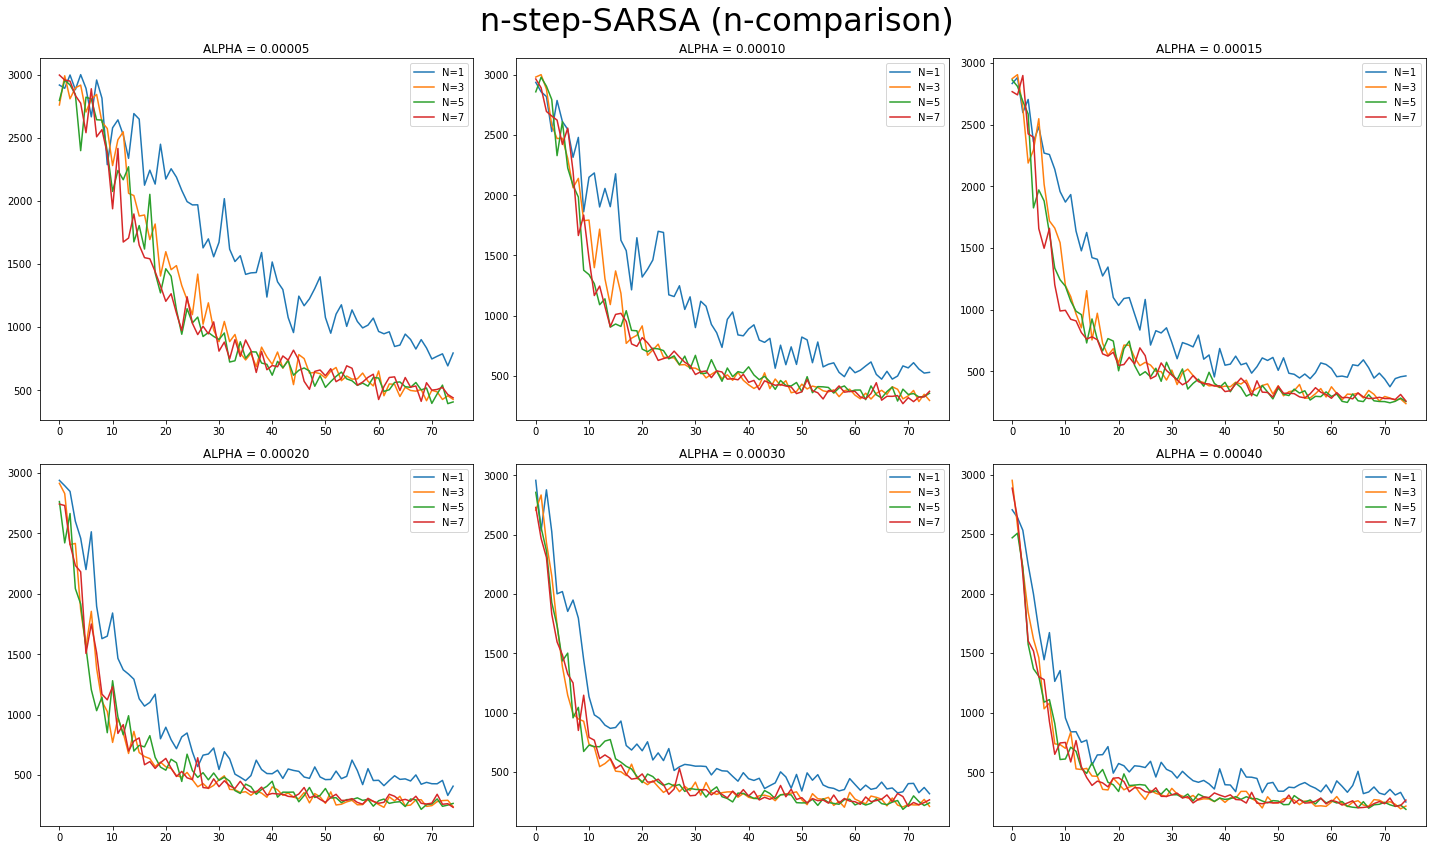

In [7]:
fig = plt.figure(figsize=(20,12))
fig.suptitle('n-step-SARSA (n-comparison)', fontsize=32)

for alpha_index, alpha in enumerate(ALPHAS):
    plt.subplot(2, 3, alpha_index+1).title.set_text(f'ALPHA = {alpha:.5f}')
    for n_index, n in enumerate(NS):
        plt.plot(np.arange(NUM_ROUNDS), mean_round_lengths_n_step[alpha_index,n_index,:], label=f"N={n}")
    plt.legend(loc=1)

fig.tight_layout(rect=[0, 0, 1, 1])

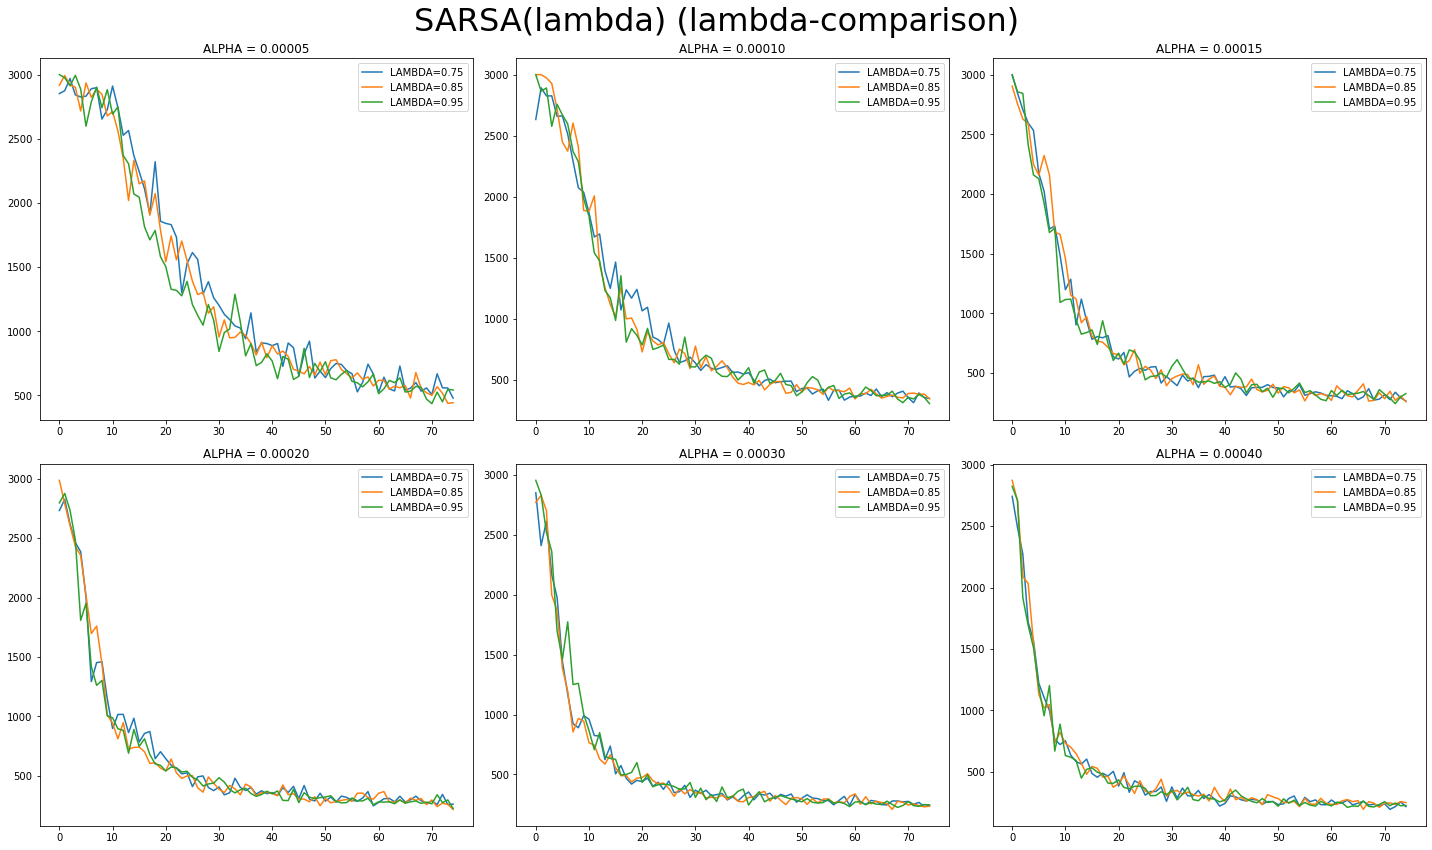

In [8]:
fig = plt.figure(figsize=(20,12))
fig.suptitle('SARSA(lambda) (lambda-comparison)', fontsize=32)

for alpha_index, alpha in enumerate(ALPHAS):
    plt.subplot(2, 3, alpha_index+1).title.set_text(f'ALPHA = {alpha:.5f}')
    for trace_decay_index, trace_decay in enumerate(TRACE_DECAYS):
        plt.plot(np.arange(NUM_ROUNDS), mean_round_lengths_sarsa_lambda[alpha_index,trace_decay_index,:], label=f"LAMBDA={trace_decay}")
    plt.legend(loc=1)

fig.tight_layout(rect=[0, 0, 1, 1])

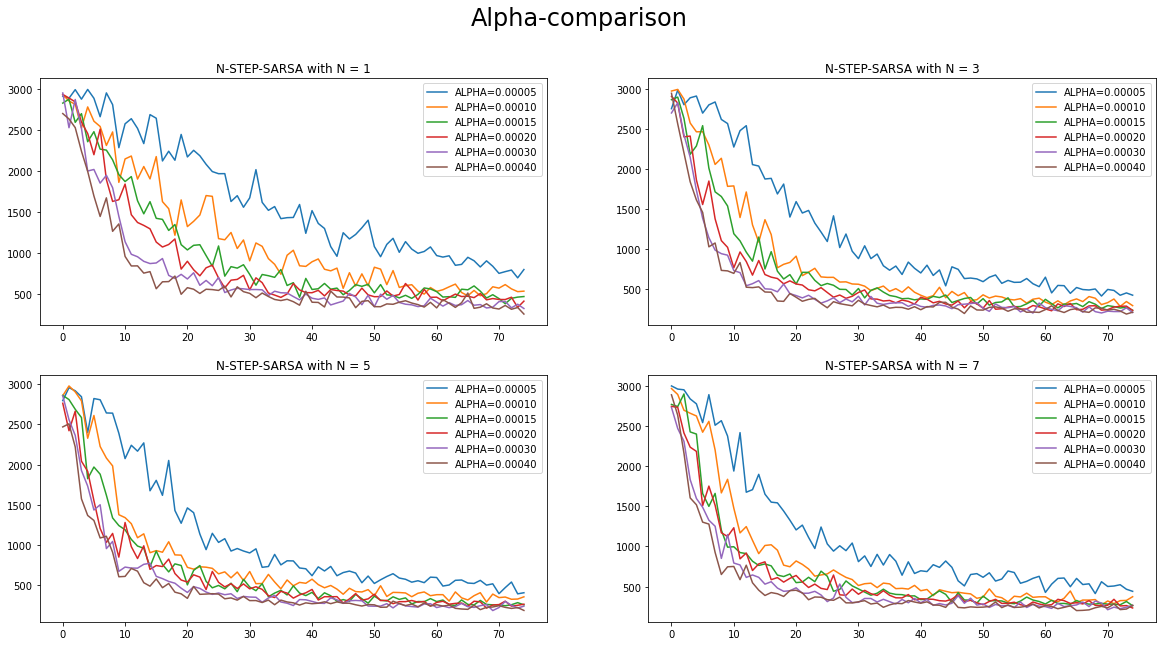

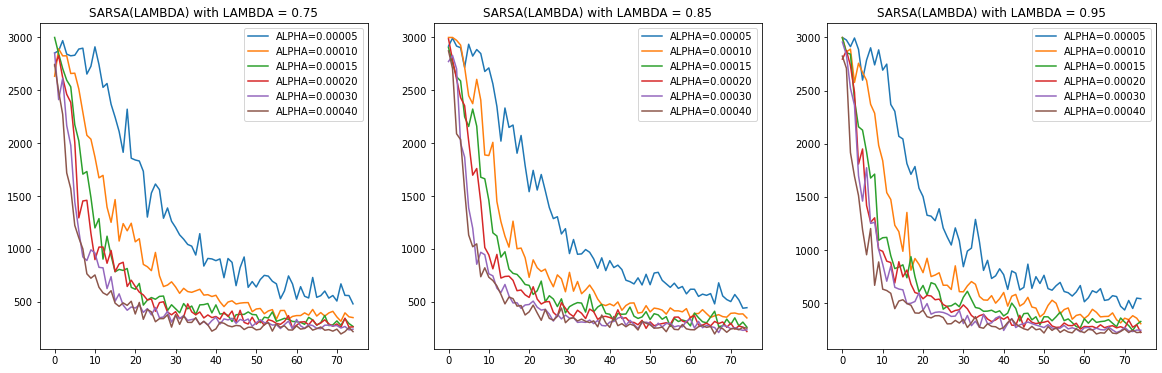

In [9]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Alpha-comparison', fontsize=24)

for n_index, n in enumerate(NS):
    plt.subplot(2, 2, n_index+1).title.set_text(f'N-STEP-SARSA with N = {n}')
    for alpha_index, alpha in enumerate(ALPHAS):
        plt.plot(np.arange(NUM_ROUNDS), mean_round_lengths_n_step[alpha_index,n_index,:], label=f"ALPHA={alpha:.5f}")
        plt.legend(loc=1)
        
fig = plt.figure(figsize=(20,6))
for trace_decay_index, trace_decay in enumerate(TRACE_DECAYS):
    plt.subplot(1, 3, trace_decay_index+1).title.set_text(f'SARSA(LAMBDA) with LAMBDA = {trace_decay}')
    for alpha_index, alpha in enumerate(ALPHAS):
        plt.plot(np.arange(NUM_ROUNDS), mean_round_lengths_sarsa_lambda[alpha_index,trace_decay_index,:], label=f"ALPHA={alpha:.5f}")
        plt.legend(loc=1)

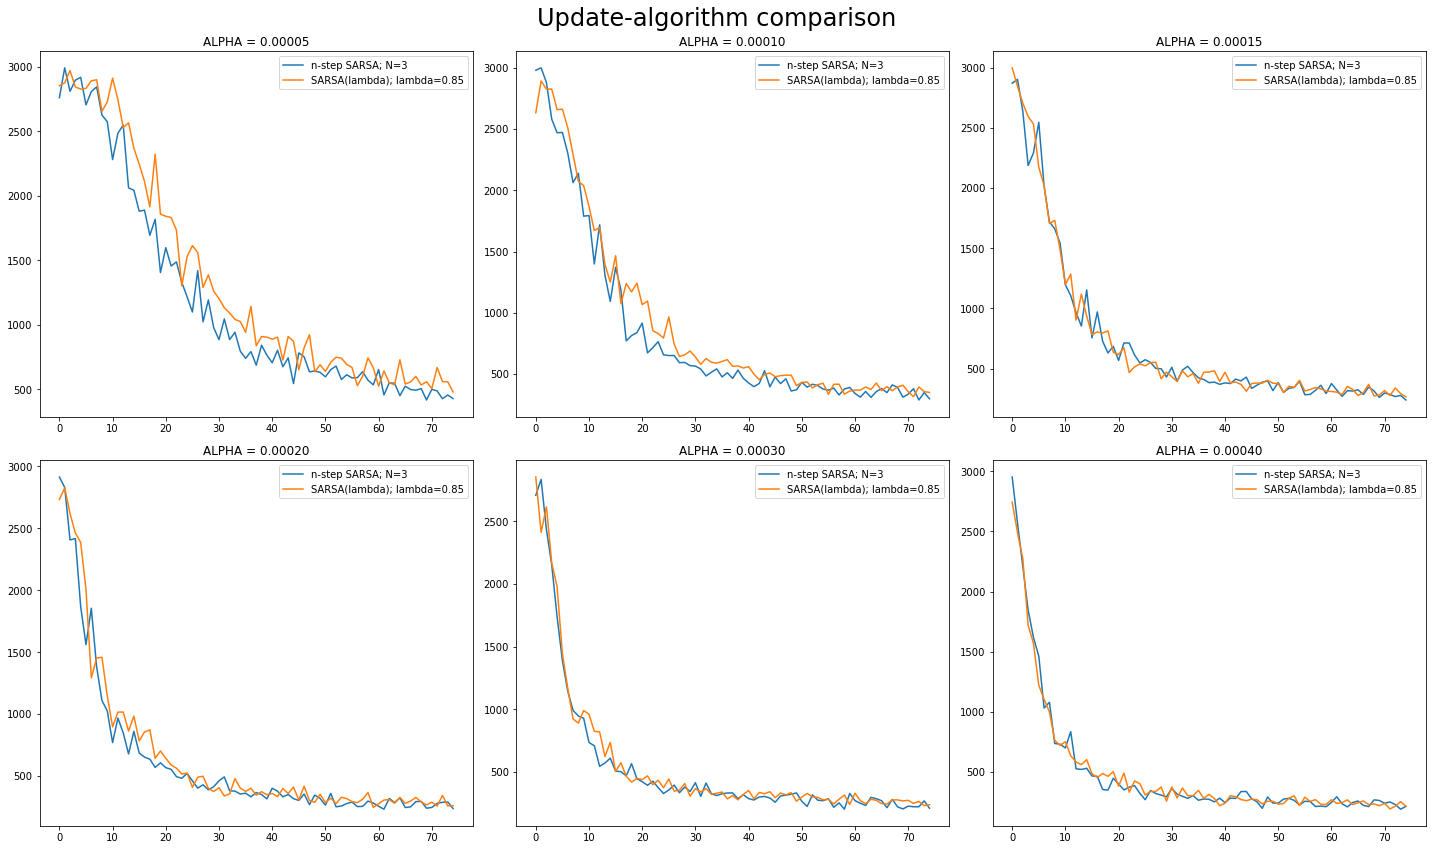

In [10]:
fig = plt.figure(figsize=(20,12))
fig.suptitle('Update-algorithm comparison', fontsize=24)

for alpha_index, alpha in enumerate(ALPHAS):
    plt.subplot(2, 3, alpha_index+1).title.set_text(f'ALPHA = {alpha:.5f}')
    plt.plot(np.arange(NUM_ROUNDS), mean_round_lengths_n_step[alpha_index,1,:], label=f"n-step SARSA; N=3")
    plt.plot(np.arange(NUM_ROUNDS), mean_round_lengths_sarsa_lambda[alpha_index,0,:], label=f"SARSA(lambda); lambda=0.85")
    plt.legend(loc=1)
    
fig.tight_layout(rect=[0, 0, 1, 1])

In [11]:
NUM_EPISODES_FOR_AVERAGE = 50

In [12]:
mean_round_lengths_n_step_first_50 = np.mean(mean_round_lengths_n_step[:,:,0:NUM_EPISODES_FOR_AVERAGE], axis=2)
mean_round_lengths_sarsa_lambda_first_50 = np.mean(mean_round_lengths_sarsa_lambda[:,:,0:NUM_EPISODES_FOR_AVERAGE], axis=2)

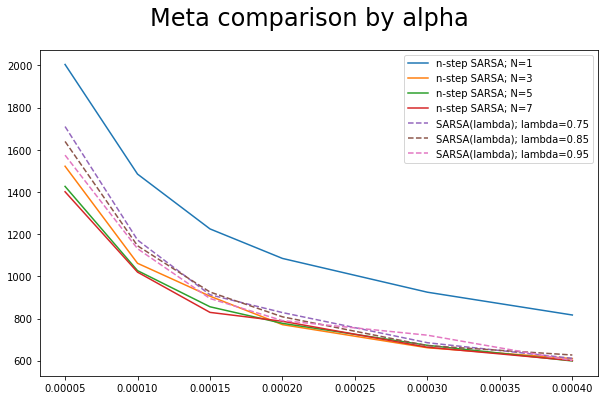

In [13]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Meta comparison by alpha', fontsize=24)


for n_index, n in enumerate(NS):
    plt.plot(ALPHAS, mean_round_lengths_n_step_first_50[:,n_index], label=f"n-step SARSA; N={n}")
    
for trace_decay_index, trace_decay in enumerate(TRACE_DECAYS):
    plt.plot(ALPHAS, mean_round_lengths_sarsa_lambda_first_50[:,trace_decay_index], label=f"SARSA(lambda); lambda={trace_decay}", linestyle="dashed")
    plt.legend(loc=1)